In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from levarage import Levarage
from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [4]:
y = iris.target
x = iris.data

In [5]:
data = pd.DataFrame([iris.data, iris.target])
data = np.asarray(data)
np.random.shuffle(data)
train = data[0:int(len(data)*0.7)]
test = data[int(len(data)*0.7):]
trainX = [row[0:2] for row in train]
trainY = [row[-1] for row in train]
testX = [row[0:2] for row in test]
testY = [row[-1] for row in test]
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
testX = np.asarray(testX)
testY = np.asarray(testY)

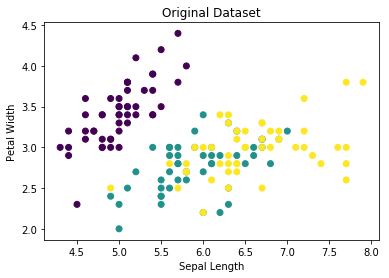

In [6]:
plt.scatter(iris.data[:, 0],iris.data[:, 1],c=iris.target)
plt.title('Original Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

### KMeans

In [7]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random')

In [8]:
start_time = time.time()
kmeans.fit(x,y)
kmeans_time = time.time() - start_time

In [9]:
kmeans_predlabels = kmeans.predict(x)
kmeans_centers = kmeans.cluster_centers_

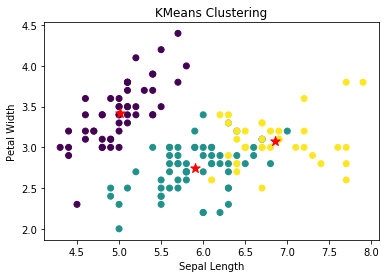

In [10]:
plt.scatter(x[:,0],x[:,1],c=kmeans_predlabels)
plt.scatter(kmeans_centers[:,0],kmeans_centers[:,1],marker='*',s=100,c='red')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [11]:
kmeans_cost_fn = kmeans.inertia_

In [12]:
print('KMeans Cost :',kmeans_cost_fn)

KMeans Cost : 78.85144142614601


### KMeans++

In [13]:
kmeansplusplus = KMeans(n_clusters=3, random_state=0, init='k-means++')

In [14]:
start_time = time.time()
kmeansplusplus.fit(x,y)
kmeansplusplus_time = time.time() - start_time

In [15]:
kmeansplusplus_predlabels = kmeansplusplus.predict(x)
kmeansplusplus_centers = kmeansplusplus.cluster_centers_

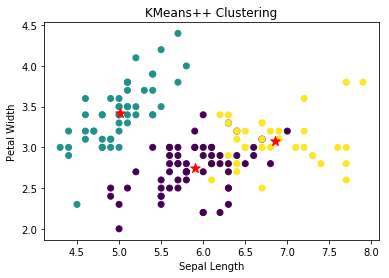

In [16]:
plt.scatter(x[:,0],x[:,1],c=kmeansplusplus_predlabels)
plt.scatter(kmeansplusplus_centers[:,0],kmeansplusplus_centers[:,1],marker='*',s=100,c='red')
plt.title('KMeans++ Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [17]:
kmeansplusplus_cost_fn = kmeansplusplus.inertia_

In [18]:
print('KMeans++ Cost :',kmeansplusplus_cost_fn)

KMeans++ Cost : 78.85144142614601


In [19]:
def k_means_objective(X, centres):
    obj = 0
    for point in X:
        if point not in centres:
            distance = [sum((point-i)**2) for i in centres]
            obj += min(distance)
    return obj

In [20]:
kmeans_obj = k_means_objective(x,kmeans_centers)

In [21]:
def random_sampling(X, n_sampleratio=0.7, seed=0):
    data_ = X
    np.random.seed(seed)
    np.random.shuffle(data_)
    sample_data = data_[0:int(len(data_)*n_sampleratio)]
    return sample_data

def random_sampling1(X,n=0.7, seed=0):
    data_ = X
    np.random.seed(seed)
    sampling_idx = np.random.randint(0,len(X),size=int(n*len(X)))
    new_data = []
    for i in sampling_idx:
        new_data.append(data_[i])
    new_data=np.array(new_data)
    return new_data

In [22]:
X_,y_ = random_sampling(x,y)
start_time = time.time()
kmeans.fit(X_,y_)
random_sampling_time = time.time() - start_time

TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
random_sample_centres = kmeans.cluster_centers_
random_score = k_means_objective(features,random_sample_centres)/kmeans_obj
random_score

In [ ]:
plt.scatter(x,y,c=kmeans_predlabels)
plt.scatter(kmeans_centers[:,0],kmeans_centers[:,1],marker='*',s=100,c='red')
plt.scatter(random_sample_centres[:,0],random_sample_centres[:,1],marker='*',s=100,c='aqua')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Width')
plt.show()

In [ ]:
print('KMeans Time :',kmeans_time)
print('KMeans++ Time :',kmeansplusplus_time)
print('Random Sampling Time :',random_sampling_time)

### KDD Dataset

In [23]:
kdddata = pd.read_csv("../Data_Science_Project/Dataset/data_kddcup04/bio_train.dat",delimiter='\t',header=None)

In [24]:
kdddata_np = np.array(kdddata)
kdddata_np = kdddata_np[:,3:]

In [25]:
kmeans = KMeans(n_clusters=3, random_state=0, init='random')
start_time = time.time()
kmeans.fit(kdddata_np)
kdd_kmeans_time = time.time() - start_time

In [26]:
kdd_cost_fn_r = kmeans.inertia_
kdd_cost_fn_r

807129765944.0342

In [37]:
def levar(array, percent):
    sampler = Levarage(array)
    ix = sampler.sample_ix(percent=percent)
    return array[ix]

In [44]:
kdd_random_data = levar(kdddata_np, 10)
start_time = time.time()
kmeans.fit(kdd_random_data)
kdd_randomsampling_time = time.time() - start_time

In [45]:
kdd_random_score = k_means_objective(kdddata_np,kmeans.cluster_centers_)/kdd_cost_fn_r

In [46]:
print('KDD Levarage Sampling Score fraction of KMeans :',kdd_random_score)

KDD Levarage Sampling Score fraction of KMeans : 1.1253011013918992


In [47]:
kdd_cost_fn = kmeans.inertia_
kdd_cost_fn < kdd_cost_fn_r

True

### Coresets

In [ ]:
def create_coreset(m,datapoints):
    
    print("Creating lightweight coreset...")
    print("---Finding the mean of the data...")
    mean = []
    total_number = 0
    for datapoint in datapoints:
        if total_number == 0:
            for i in range(len(datapoint)):
                mean.append(float(0))
        for i in range(len(datapoint)):
            mean[i] += datapoint[i]
        total_number += 1
    for i in range(len(mean)):
        mean[i] /= total_number

    print("---Finding differences squared sum between the mean and data values...")
    distances_sum = []
    distances = []  
    initialized = 0
 
    for datapoint in datapoints:  
        if initialized == 0:
            for i in range(len(datapoint)):
                distances_sum.append(float(0))
            initialized = 1
    
        temp_distance = 0.0 

        for i in range(len(datapoint)):
            distances_sum[i] += abs(mean[i]-datapoint[i])
            temp_distance += abs(mean[i]-datapoint[i])
        distances.append(temp_distance**2) 

        total_distance = 0.0
        for value in distances_sum:
            total_distance += value
        total_distance = total_distance**2

    print("---Creating q(x) probability array...")
    q = []
    uniform_distribution = 0.5*(1/float(total_number))
    for i in range(len(datapoints)):
        q.append(uniform_distribution+0.5*(distances[i]/total_distance))
        
    print("---Sampling",m,"points to be used in lightweight coreset")
    for i in range(len(q)):
        weight = 1/(float(m)*q[i])
        q[i] = weight
    if int(m) >= total_number:
        for i in range(len(q)):
            coreset.append(i)
    else:
        id_list = list(range(len(datapoints)))
        for i in range(int(m)):
            selected_id = random.choices(id_list, q)[0]
            coreset.append(selected_id)
        q[selected_id] = 0.0
    print("Coreset creation complete.\n")

In [ ]:
coreset=[]
coreset_data = create_coreset(70000,kdddata_np)

In [ ]:
start_time = time.time()
kmeans.fit(kdddata_np[coreset])
kdd_coresets_time = time.time() - start_time
kdd_coresets_sample_centres = kmeans.cluster_centers_
kdd_coresets_score = k_means_objective(kdddata_np,kdd_coresets_sample_centres)/kdd_cost_fn
print('KDD KMeans Time :',kdd_kmeans_time)
print('KDD Random Sampling Time:',kdd_randomsampling_time)
print('KDD Coresets Time :',kdd_coresets_time)

In [ ]:
print('KDD Coreset Score in comparison to KMeans :',kdd_coresets_score)
print('KDD Random Sampling Score in comparison to KMeans :',kdd_random_score)